In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from regression import Model

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df

,id,ride_style,speed,poster,staff,time,is_female,is_assistant,is_raining,day,week,total_passenger
0,1,ls,0,0,0,40,1,0,0,Mon,0,351
1,2,ls,0,0,0,40,0,0,0,Mon,0,351
2,3,ls,0,0,0,40,0,0,0,Mon,0,351
3,4,ls,0,0,0,40,0,0,0,Mon,0,351
4,5,ls,0,0,0,40,0,0,0,Mon,0,351
...,...,...,...,...,...,...,...,...,...,...,...,...
5691,5692,ls,1,1,1,58,0,0,1,Wed,3,340
5692,5693,ls,1,1,1,58,1,0,1,Wed,3,340
5693,5694,rs,1,1,1,58,0,1,1,Wed,3,340
5694,5695,rs,1,1,1,59,0,1,1,Wed,3,340


# Figure 1: Walk

In [4]:
dfa = df.copy()

In [5]:
# walk: 1, stand: 0
ride_style_map = {'rw': 1, 'lw': 1, 'rs': 0, 'ls': 0}
dfa.replace({'ride_style': ride_style_map}, inplace=True)

In [6]:
time = dfa[dfa['time'].duplicated() == False]['time']

ride_count = list()
for t in time:
    c = dfa[(dfa['ride_style'] == 1) & (dfa['time'] == t)]['id'].count()
    ride_count.append(c)

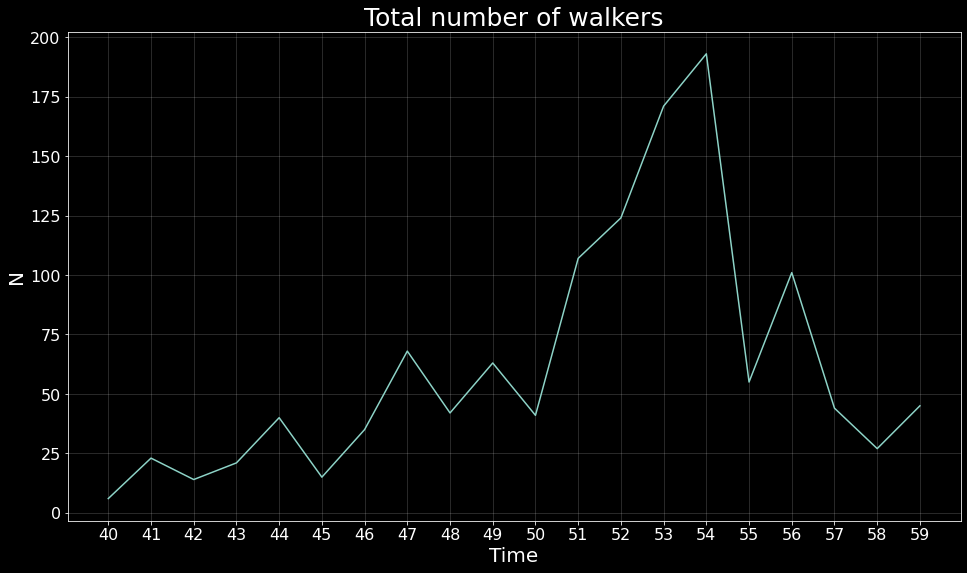

In [7]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(16, 9))
    
    plt.title('Total number of walkers', fontsize=25)
    plt.xlabel('Time', fontsize=20)
    plt.ylabel('N', fontsize=20)
    plt.xticks(time, fontsize=16)
    plt.yticks(fontsize=16)
    
    plt.plot(time, ride_count)
    plt.grid(alpha=0.2)
    
    plt.show()

# t-test (rs:1, rw,lw,ls: 0)

In [8]:
dfb = df[df['is_assistant'] == 0].copy()

In [9]:
ride_style_map = {'rw': 0, 'lw': 0, 'rs': 1, 'ls': 0}
dfb.replace({'ride_style': ride_style_map}, inplace=True)

In [10]:
Y = dfb['ride_style']
X = dfb[['speed', 'poster', 'staff', 'time', 'is_female', 'is_raining', 'week', 'total_passenger']]
m = Model(Y, X)

In [11]:
m.regression()

Regression starts... 

Explained variable: ride_style

Adjusted R-squared: 0.0044

Two-tailed t-test results:

              Name      Coef   Std Err   t-value   p-value
0       _constant_ -0.045665  0.017271 -2.644038  0.008084
1            speed -0.002858  0.007682 -0.372079  0.706861
2           poster  0.016543  0.009521  1.737623  0.081447
3            staff  0.021896  0.011386  1.923072  0.054056
4             time  0.001029  0.000351  2.936259  0.003275
5        is_female -0.001241  0.003225 -0.384980  0.697958
6       is_raining -0.022655  0.011574 -1.957430  0.049716
7             week -0.005777  0.006828 -0.846164  0.395230
8  total_passenger  0.000035  0.000020  1.731314  0.082856 


Correlation between independent variables:

                    speed    poster     staff      time  is_female  \
speed            1.000000  0.527617  0.241802  0.017433  -0.000600   
poster           0.527617  1.000000  0.458290  0.038284  -0.007847   
staff            0.241802  0.458290  1.000

# t-test (ls,rs:1, rw,lw:0)

In [12]:
dfc = df[df['is_assistant'] == 0].copy()

In [13]:
ride_style_map = {'rw': 0, 'lw': 0, 'rs': 1, 'ls': 1}
dfc.replace({'ride_style': ride_style_map}, inplace=True)

In [14]:
Y = dfc['ride_style']
X = dfc[['speed', 'poster', 'staff', 'time', 'is_female', 'is_raining', 'week', 'total_passenger']]
m = Model(Y, X)

In [16]:
m.regression()

Regression starts... 

Explained variable: ride_style

Adjusted R-squared: 0.2072

Two-tailed t-test results:

              Name      Coef   Std Err    t-value   p-value
0  total_passenger -0.000518  0.000113  -4.582707  0.000004
1       _constant_  2.718007  0.066975  40.582314  0.000000
2            speed  0.046179  0.026961   1.712846  0.086099
3           poster  0.051292  0.033419   1.534796  0.123973
4            staff  0.115849  0.027548   4.205308  0.000025
5             time -0.038205  0.001171 -32.614942  0.000000
6        is_female  0.075014  0.010580   7.090354  0.000000
7       is_raining  0.055027  0.025925   2.122524  0.033467
8             week -0.036208  0.023628  -1.532406  0.124462 


Correlation between independent variables:

                 total_passenger     speed    poster     staff      time  \
total_passenger         1.000000 -0.116823 -0.209182  0.274509 -0.009135   
speed                  -0.116823  1.000000  0.527617  0.241802  0.017433   
poster        